Importing the modules to be used

In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data with pandas DataFrame fumction

In [38]:
df = pd.read_csv('medical_examination.csv', header=0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Adding an overweight column for the patients

In [39]:
df['overweight'] = (df['weight']/((df['height']/100)**2)).apply(lambda x : 1 if x > 25 else 0)

Normalizing the data into binary form

In [40]:
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x == 1 else 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


##### Seaborn Plotting
Creating a dataframe suitable for the plot by splitting the data by cardio, this is possible because all the value variables are binary (0,1)

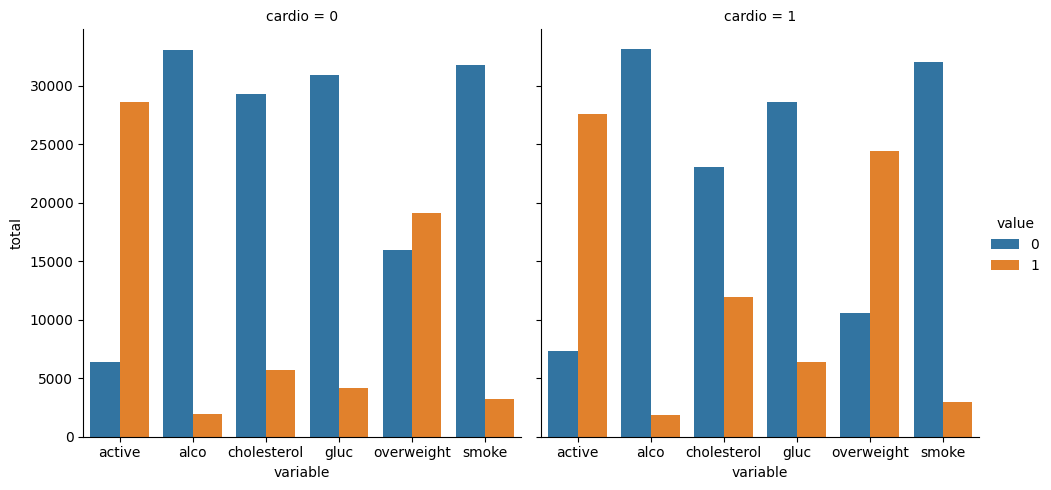

In [47]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat['total']=1
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count()
sns.catplot(x='variable', y= 'total',data= df_cat, hue = 'value', kind= 'bar', col = 'cardio')
plt.show()

##### Heatmap
Drawing a heatmap, we first have to clean the data to get only the valid information

In [42]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025))& (df['height'] >= df['height'].quantile(0.975))& (df['weight'] >= df['weight'].quantile(0.025))& (df['weight'] >= df['weight'].quantile(0.975))]

Getting the correlation matrix

In [46]:
corr = df_heat.corr(method='pearson')

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


Masking the upper half of the correlation matrix

In [44]:
mask= np.triu(corr)

<AxesSubplot: >

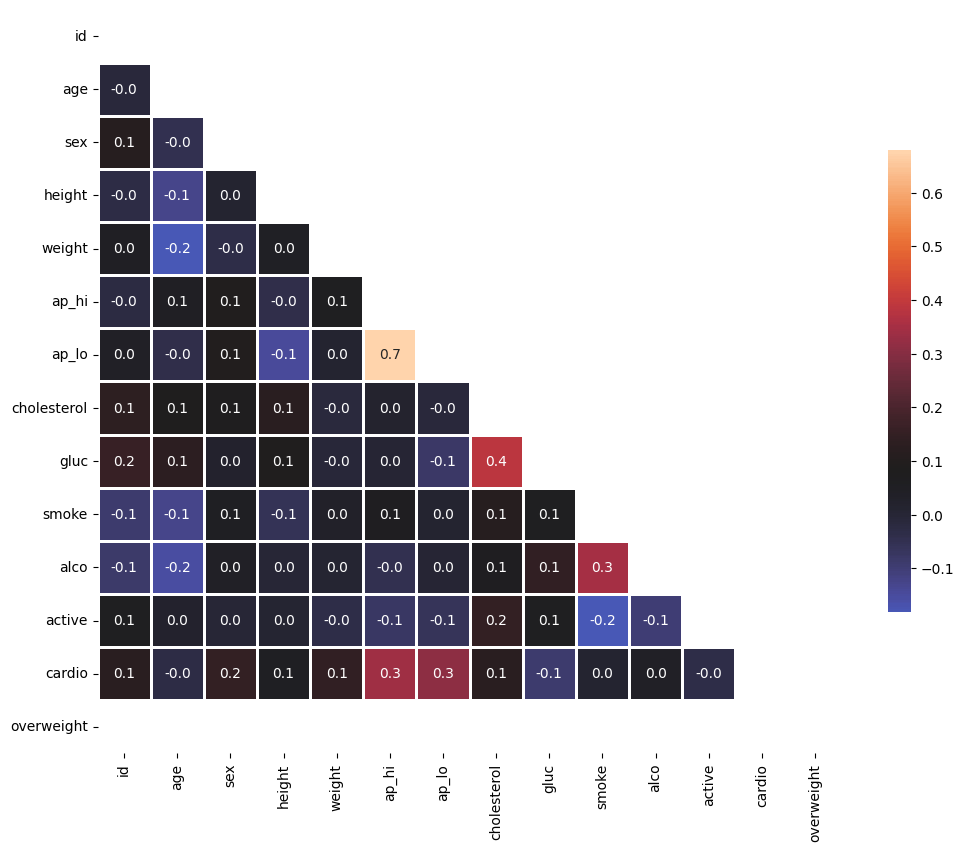

In [45]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, linewidths =1,annot=True, square= True, mask=mask, fmt= '.1f', center=0.08, cbar_kws = {'shrink':0.5})